In [3]:
from utils.utils import *
from utils.metrics import * 
from utils.gnn import *
from utils.plots import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.LSTM import *

In [4]:
# with open("config.yaml", 'r') as file:
#             config_data = yaml.safe_load(file)
            
# dfs = dowload_tickers(config_data)

stocks = ["AAPL", "MSFT", "CMCSA", "COST", "QCOM", "ADBE", "SBUX", "INTU", "AMD", "INTC"]

dfs = {s: pd.read_csv(f"./prices/{s}_prices.csv", index_col=0, parse_dates=True) for s in stocks}

start_day    = "2025-01-01"

horizon_days = 50                           # cantidad de días hábiles a predecir
training_years = 2                         # años previos para entrenar y predecir cada día

models = ["LSTM", "LSTM+GNN"]

feat_cols = ["Close"]

# TRAINING
##########
results = {}
for model in models:
    results[model] = {}
    for stock in stocks:
        res = walk_forward_predict(     LSTMRegressor,
                                        dfs, 
                                        stock,
                                        start_day, 
                                        horizon_days,
                                        training_years=training_years,
                                        feat_cols=feat_cols,

                                        W=50,
                                        
                                        # lstm
                                        hidden_size=64, 
                                        num_layers=2, 
                                        dropout=0.5,
                                        hit_coef=0.05,
                                        batch_size=11, 
                                        epochs=40, 
                                        lr=0.005,
                                        patience=5,
                                        
                                        torch_seed=0,
                                        model = model
                                    )
        results[model][stock] = res

Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:26<00:00,  1.72s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:38<00:00,  1.97s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:51<00:00,  2.24s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:17<00:00,  1.55s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:31<00:00,  1.83s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:54<00:00,  2.29s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [02:17<00:00,  2.76s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [02:02<00:00,  2.46s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:27<00:00,  1.75s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:26<00:00,  1.72s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:33<00:00,  1.86s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:11<00:00,  1.43s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:18<00:00,  1.58s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [02:21<00:00,  2.84s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:56<00:00,  2.32s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:39<00:00,  1.99s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:29<00:00,  1.79s/it]


Running in cuda...
Test days: 50 days, from 2025-01-02 to 2025-03-17


Processing test days: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


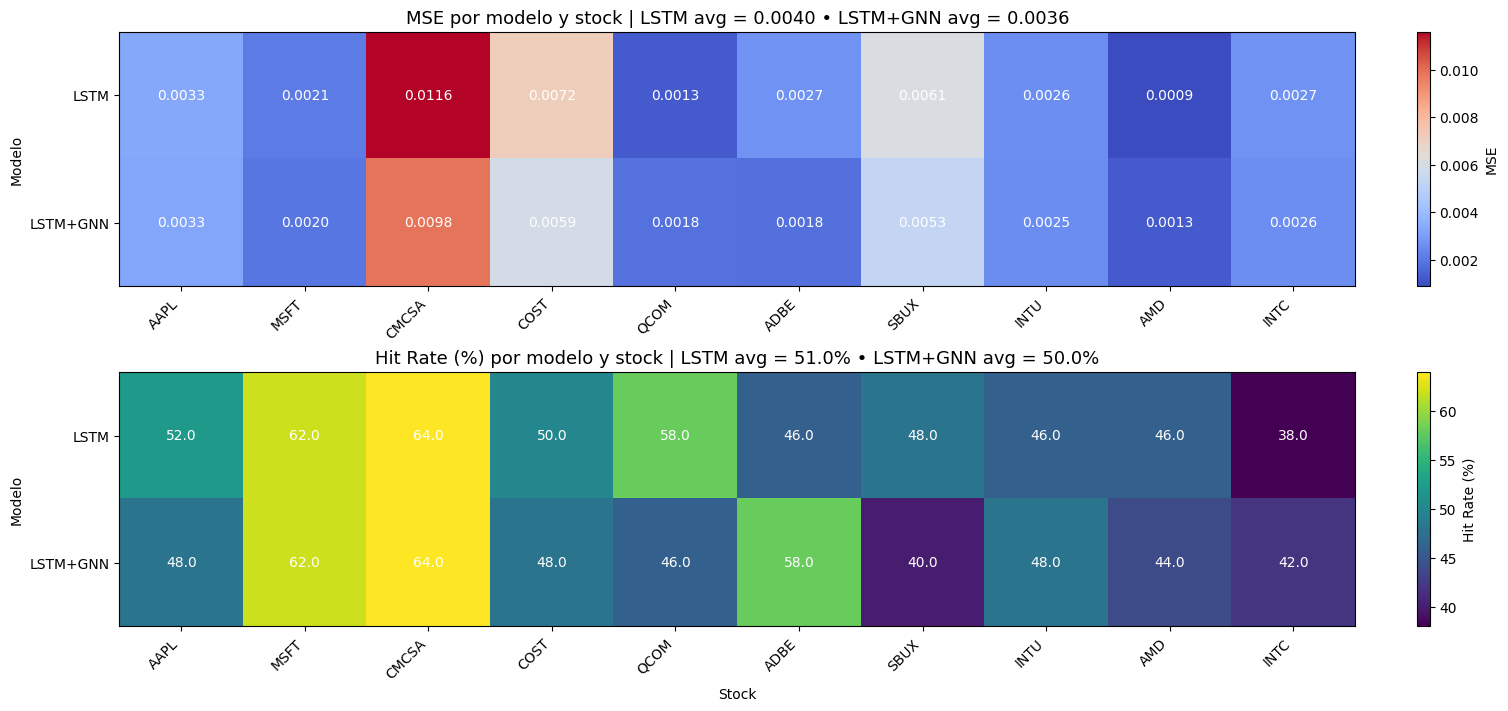

In [5]:
grid_mse_and_hit(results)

In [6]:
import os

import json
import os

def save_results_to_txt(results, filename="results/results.txt"):

    os.makedirs("results", exist_ok=True)

    with open(filename, "w") as f:
        for model, stocks_dict in results.items():
            f.write(f"=== Modelo: {model} ===\n\n")
            for stock, res in stocks_dict.items():

                df_res, meta = res   # res = (dataframe, metadata dict)

                f.write(f"-- Stock: {stock} --\n")

                # MSE y HIT_RATE
                mse_val = meta.get("mse", None)
                hit_val = meta.get("hit_rate", None)

                f.write(f"  MSE: {mse_val}\n")
                f.write(f"  Hit Rate: {hit_val}\n")

                f.write("\n  Predictions:\n")
                f.write(df_res.to_string())
                f.write("\n\n")

            f.write("\n" + "="*60 + "\n\n")

save_results_to_txt(results)
